# Worksheet 18

Name:  Hao Qi, Hui Zheng  
UID:  U96305250, U80896784  

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times. I’ve recorded the times at which it went off for the past year (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the Piazza poll if you think you found the answer.

356,00:15:25

## Linear Regression

Where does randomness come from?

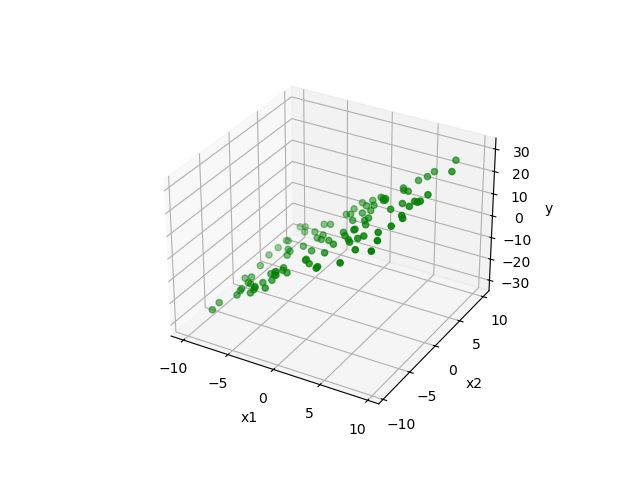

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axis
ax = fig.add_subplot(111, projection='3d')
# and plot the point 
ax.scatter(x1, x2, y, color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 points where `Y = 1 + 0.5 * X + eps`.

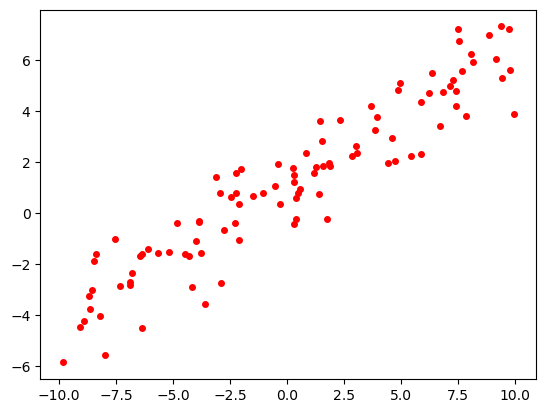

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1.0, 0.5])
# x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE) # for clarity
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x, y, 'ro', markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

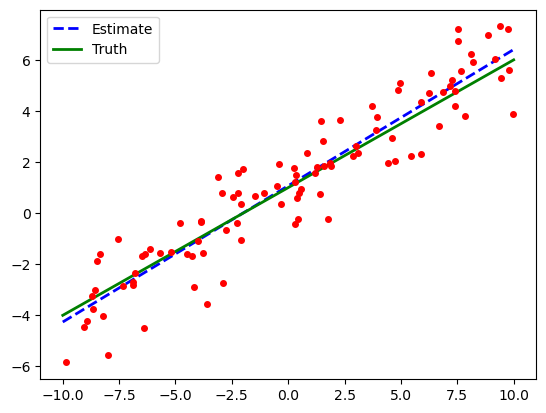

In [4]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10, 10, 50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0]+true_beta[1]*x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y, 'ro', markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [5]:
print(beta_hat)

[1.07214811 0.53335217]


As the graph and numerical result show, the estimate and true values of `beta` are quite close, and the difference is in the percentile. We seem to have a reasonable estimate, and the deviation is probably from the randomness we introduced when generating the data points. 

d) Create and plot a dataset of 100 points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

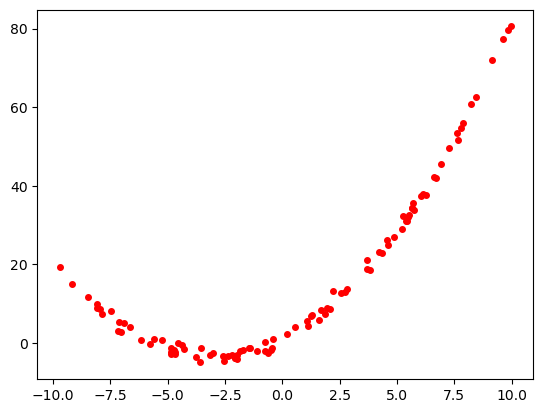

In [6]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1.0, 3.0, 0.5])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE) # for clarity
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
plt.plot(x, y, 'ro', markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

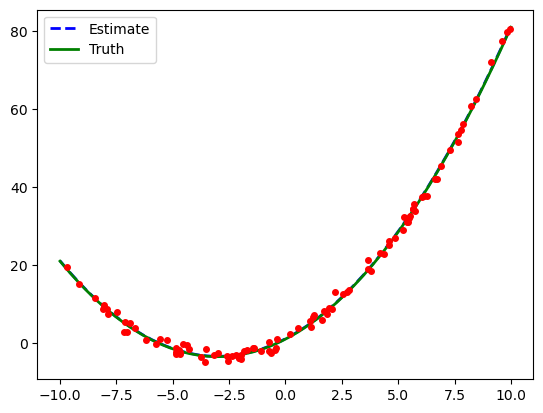

In [7]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10, 10, 50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
y_true = true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot**2
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')
plt.plot(x_plot, y_true, lw=2, c='g', label='Truth')
plt.plot(x, y, 'ro', markersize=4)
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [8]:
print(beta_hat)

[1.08943647 3.00473816 0.50047915]


The estimated values ([1.08943647 3.00473816 0.50047915]) are still close to the true values ([1.0, 3.0, 0.5]), making the data points evenly distribute around the estimated curve.

g) Let's repeat d) and e) a large number of times to see how close our estimates are on average and what that distribution looks like.

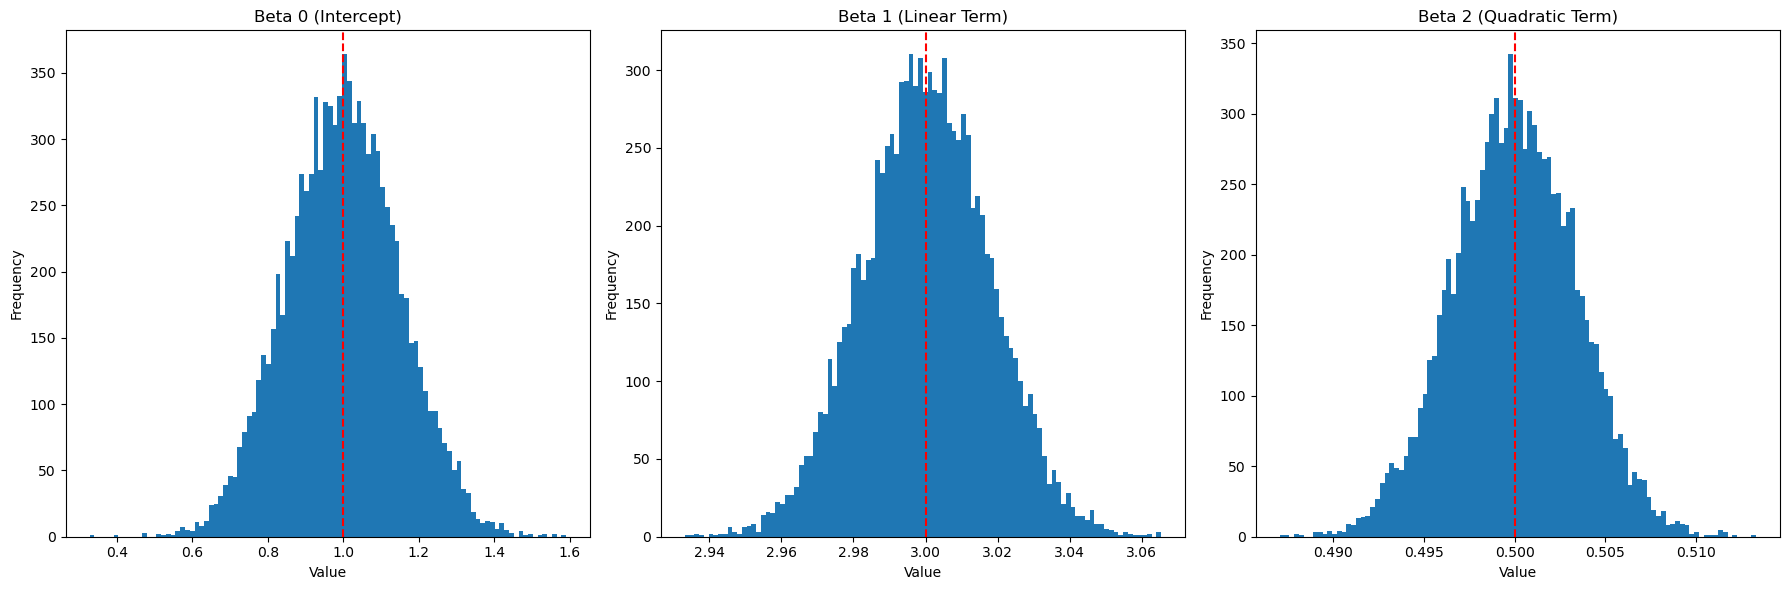

In [10]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

betas = []
true_beta = np.array([1.0, 3.0, 0.5])
for _ in range(10000):
    x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE) # for clarity
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)


betas = np.array(betas)
plt.figure(figsize=(18, 6))
titles = ['Beta 0 (Intercept)', 'Beta 1 (Linear Term)', 'Beta 2 (Quadratic Term)']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(betas[:, i], bins=100)
    plt.axvline(x=true_beta[i], c='r', linestyle='dashed')
    plt.title(titles[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

For each parameter, most of the estimated values are around the actual value and imply a normal distribution. 